# 데이터 불러오기

In [74]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
print(data_train.shape)
data_train.head(5).transpose()

(1253, 10)


,0,1,2,3,4
id,1,2,3,4,5
Gender,M,I,I,M,I
Lenght,0.605,0.43,0.58,0.535,0.31
Diameter,0.47,0.315,0.49,0.405,0.235
Height,0.115,0.095,0.195,0.175,0.09
Whole Weight,1.114,0.378,1.3165,1.2705,0.127
Shucked Weight,0.3925,0.175,0.5305,0.548,0.048
Viscra Weight,0.291,0.08,0.254,0.3265,0.031
Shell Weight,0.31,0.1045,0.41,0.337,0.04
Target,15,8,18,13,6


# feature 설명
- Gender 전복의 성별
- Length 전복의 길이 (껍질?)
- Diameter 전복의 지름
- Height 전복의 높이
- Whole Weight 전복의 전체 무게
- Shucked Weight 전복의 껍질과 내장을 제외한, 손질된 무게 (젖은 상태로 측정)
- Viscra Weight 전복의 내장 무게
- Shell Weight 전복의 껍데기 무게 (건조후 측정)
- Target 나이

오타가 불편하니 바꿔줍시다

In [75]:
data_train.rename(columns = {"Lenght":"Length"}, inplace = True)
data_test.rename(columns = {"Lenght":"Length"}, inplace = True)

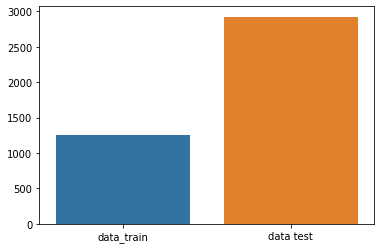

In [76]:
x = ["data_train", "data test"]
y = [data_train.shape[0], data_test.shape[0]]
ax = sns.barplot(x=x, y=y)

## 이상치 제거

In [78]:
data_train[data_train["Target"]>20]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,217,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,449,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,554,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,630,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,736,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,763,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,793,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1132,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,1141,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1173,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [79]:
data_train = data_train.drop(index = [762], axis = 0)

우선 혼자서 29의 높은 점수를 가진 열을 이상치라고 판단하고 제거하였습니다.

In [80]:
data_train[data_train["Whole Weight"] < data_train["Viscra Weight"] + data_train["Shucked Weight"] + data_train["Shell Weight"]]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
119,120,I,0.375,0.280,0.080,0.2165,0.0935,0.0925,0.0700,7
129,130,I,0.485,0.365,0.140,0.4475,0.1895,0.0925,0.2305,8
179,180,I,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.0150,5
224,225,I,0.450,0.335,0.105,0.4470,0.2335,0.1530,0.1190,7
290,291,F,0.480,0.380,0.145,0.5900,0.2320,0.1410,0.2300,12
324,325,I,0.420,0.330,0.100,0.3520,0.1635,0.0890,0.1000,9
346,347,I,0.260,0.215,0.080,0.0990,0.0370,0.0255,0.0450,5
368,369,I,0.290,0.225,0.075,0.1520,0.0710,0.0590,0.0450,9
374,375,I,0.360,0.275,0.095,0.2170,0.0840,0.0435,0.0900,7


In [81]:
for i in range(data_train.shape[0]):
    if (data_train["Whole Weight"].iloc[i] < data_train["Shucked Weight"].iloc[i] + data_train["Shell Weight"].iloc[i] + data_train["Viscra Weight"].iloc[i]):
        data_train["Whole Weight"].iloc[i] = data_train["Shucked Weight"].iloc[i] + data_train["Shell Weight"].iloc[i] + data_train["Viscra Weight"].iloc[i]
        
for i in range(data_test.shape[0]):
    if (data_test["Whole Weight"].iloc[i] < data_test["Shucked Weight"].iloc[i] + data_test["Shell Weight"].iloc[i] + data_test["Viscra Weight"].iloc[i]):
        data_test["Whole Weight"].iloc[i] = data_test["Shucked Weight"].iloc[i] + data_test["Shell Weight"].iloc[i] + data_test["Viscra Weight"].iloc[i]

그다음 전복의 전체 무게가 전복살 무게 + 껍질의 무게 + 내장의 무게 보다 작은 경우가 있는지 검사했는데 존재하고 있었습니다.

따라서 전복을 분리하고 나니 무게가 늘어났다는것은 이상하기 때문에 
~이상치라고 판단하고 제거했습니다.~ -> 무게를 합쳐서 대치를 해줬습니다.

In [82]:
data_train[data_train["Length"] < data_train["Diameter"]]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target


다행히도 길이보다 지름이 더 큰 경우는 존재하지 않고 있습니다.

## 새로운 feature을 통한 전처리

전체 무게에서 전복의 무게와 껍질의 무게를 빼게 되면 남는 값이 있는데, 이는 전복이 머금고 있었던 물이라고 합니다.

따라서 전복이 머금고 있던 물을 Shell Water라고 이름짓고, Whole Weight에서 빼주어 학습시 전복이 랜덤하게 머금던 물의 영향을 받지 않도록 했습니다.

In [83]:
data_train["Shell Water"] = data_train["Whole Weight"] - (data_train["Shucked Weight"] + data_train["Shell Weight"] + data_train["Viscra Weight"])
data_train = data_train.drop(columns = ['id'], axis = 1)

data_test["Shell Water"] = data_test["Whole Weight"] - (data_test["Shucked Weight"] + data_test["Shell Weight"] + data_test["Viscra Weight"])
data_test = data_test.drop(columns = ['id'], axis = 1)

<AxesSubplot:xlabel='Target', ylabel='Count'>

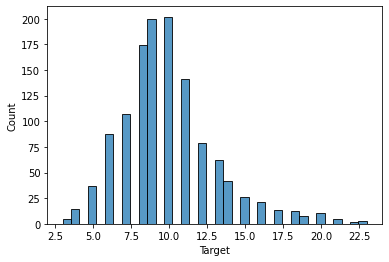

In [84]:
sns.histplot(data_train['Target'])

실제로 Target의 분포를 보니 10을 기준으로 종모양의 분포가 나타나고 있는 것으로 보입니다.

15 이상 Target에 대한 샘플이 충분하지 않아, oversampling이 필요한 것으로 보입니다.

가설을 뒷받침하려고 샘플 모델을 돌려본 후 결과를 보았는데, 15 이상의 큰 Target에 대해서 정확하게 맞추지 못하는 모습을 보였습니다.

In [85]:
data_train_T=data_train['Target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 10:
        target.append(1)
    elif data_train_T.iloc[i] < 15:
        target.append(2)
    else:
        target.append(3)
        
data_train["Range"] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

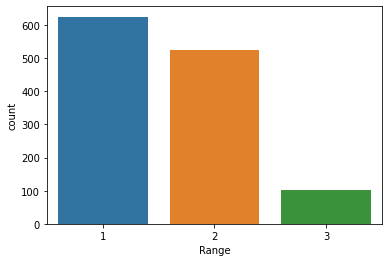

In [86]:
sns.countplot(x = data_train["Range"])

## 가중치 값 증가

Copy Over Sampling을 진행했습니다. 간단하게 기존에 존재하는 소수의 클래스를 단순 복제해서 가중치만을 늘려준 기법입니다.

확실히 **over sampling 덕분에 private score에서 순위가 훨씬 높아진 것 같습니다.** 최대한 균형적인 학습을 하려던 시도가 유효한것 같네요!

In [87]:
data_train_3 = data_train[data_train['Range']==3]

In [88]:
data_train = data_train.append(data_train_3)

<AxesSubplot:xlabel='Range', ylabel='count'>

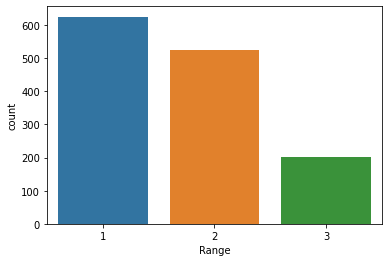

In [89]:
sns.countplot(x = data_train["Range"])

## 데이터셋 X, Y 나누기

pd.get_dummies를 통해 Gender feature에 one hot encoding을 적용해줍니다.

In [90]:
data_test = pd.get_dummies(data_test)
data_test.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Shell Water,Gender_F,Gender_I,Gender_M
0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.3365,1,0,0
1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.1095,0,0,1
2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.0060,0,1,0
3,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.1115,0,0,1
4,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.0465,1,0,0


In [91]:
data_train = pd.get_dummies(data_train)
data_train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Shell Water,Range,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0.1205,3,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.0185,1,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0.1220,3,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0.0590,2,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0.0080,1,0,1,0


In [92]:
data_train_X = data_train.drop(columns = ['Target'], axis = 1)
data_train_X.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Shell Water,Range,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0.1205,3,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0.0185,1,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0.1220,3,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0.0590,2,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0.0080,1,0,1,0


In [93]:
data_train_y = data_train['Target']
data_train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

# 모델 생성 및 학습하기

MLP + NGB + XGB + CATBOOST 4가지 모델 soft 앙상블 -> 0.143에서 더이상 성능 향상이 일어나지 않음

https://dacon.io/competitions/official/235877/codeshare/4711?page=1&dtype=recent - 이전에 공유했던 코드에 모델이 나와있습니다.

따라서 즈믄님이 공유해주신 간단한 nn 모델을 이용하여 10번 fold를 진행함 -> 0.141

https://dacon.io/competitions/official/235877/codeshare/4714?page=1&dtype=recent

In [94]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

import tensorflow as tf

tf.random.set_seed(42)
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 15번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']):
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #분배된 학습을 위해 만들어둔 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    model = Sequential()
    model.add(Dense(16, input_dim=11, activation='elu'))
    model.add(Dense(32, activation='elu'))    
    model.add(Dense(64, activation='elu'))  
    model.add(Dropout(0.5))  
    model.add(Dense(32, activation='elu'))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(1))


    model.compile(loss='mean_absolute_error',
                  optimizer='Nadam', 
                  metrics=['mae'])
    
    filename = 'nn-checkpoint.h5'
    checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                                monitor='val_mae',   # val_accuracy 값이 개선되었을때 호출됩니다
                                verbose=0,            # 로그를 출력합니다
                                save_best_only=True,  # 가장 best 값만 저장합니다
                                mode='min'           # auto는 알아서 best를 찾습니다. min/max (loss->min, accuracy->max)
                               )

    earlystopping = EarlyStopping(monitor='val_mae', #stop 조건으로 관찰할 변수 선택
                                 patience=100,       #50 Epoch동안 (val-accuracy가)개선되지 않는다면 종료
                                 mode='min'
                                )

    reduceLR = ReduceLROnPlateau(monitor='val_mae', #lr을 낮출 조건으로 관찰할 변수 선택
                                factor=0.2,             #조건이 충족되었을때 LR에 factor를 곱함 (5분의 1배가 됨)
                                patience=50,  #40 Epoch동안 (val-accuracy가)개선되지 않는다면 lr 감소
                                mode = 'min'
                               )
    
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1000, batch_size=32, verbose=0, callbacks=[earlystopping, checkpoint, reduceLR])
    
    model = load_model('./nn-checkpoint.h5') #학습했던 NN 불러오기

    val_pred_name.append("NN")  # 모델 이름 저장
    val_pred.append(model.predict(X_valid).flatten())   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test).flatten()) # test set pred 결과 저장

    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE with Round Down %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("Average NMAE with Round %0.4f" %(NMAE(y_valid, np.round(preds))))
    print("")
    
    fold_score.append(NMAE(y_valid, preds.astype(int)))
    fold_score.append(NMAE(y_valid, np.round(preds)))
    
print("==============================")

total_score = fold_score[0]
for i in range(2, len(fold_score), 2):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score)/2)

print("Average Sum Model Round Down NMAE %0.4f" %(total_score))

total_score = fold_score[1]
for i in range(3, len(fold_score), 2):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score)/2)

print("Average Sum Model Round NMAE %0.4f" %(total_score))

========== fold 1 ==========
NN model NMAE : 0.1517
Average NMAE with Round Down 0.1517
Average NMAE with Round 0.1525

========== fold 2 ==========
NN model NMAE : 0.1337
Average NMAE with Round Down 0.1337
Average NMAE with Round 0.1341

========== fold 3 ==========
NN model NMAE : 0.1440
Average NMAE with Round Down 0.1440
Average NMAE with Round 0.1345

========== fold 4 ==========
NN model NMAE : 0.1232
Average NMAE with Round Down 0.1232
Average NMAE with Round 0.1313

========== fold 5 ==========
NN model NMAE : 0.1453
Average NMAE with Round Down 0.1453
Average NMAE with Round 0.1481

========== fold 6 ==========
NN model NMAE : 0.1479
Average NMAE with Round Down 0.1479
Average NMAE with Round 0.1475

========== fold 7 ==========
NN model NMAE : 0.1459
Average NMAE with Round Down 0.1459
Average NMAE with Round 0.1477

========== fold 8 ==========
NN model NMAE : 0.1431
Average NMAE with Round Down 0.1431
Average NMAE with Round 0.1421

========== fold 9 ==========
NN model NM

In [96]:
np.array(fold_target_pred).shape

(10, 2924)

# 제출하기

In [97]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = np.round(final_pred)

np.round가 nn모델에서는 버림보다 좋은 성적을 보여줌

.astype(int)는 tree 기반 모델에서 좋은 성적을 보여줌

In [98]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [99]:
submission['Target'] = final_pred
submission.head(5)

,id,Target
0,1,11.0
1,2,15.0
2,3,5.0
3,4,12.0
4,5,10.0


In [100]:
submission.to_csv("Submit_13.csv",index=False)